<a href="https://colab.research.google.com/github/ShivaniMohite1/CodeClauseInternship_ProjectName/blob/main/CodeClause_DS_Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeClause Data Science Internship**

**Allocated Project :-**

**Project 2 :- Sentiment Analysis**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/training.1600000.processed.noemoticon.csv
/content/testdata.manual.2009.06.14.csv
/content/train.csv
/content/test.csv
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2023.12.04/14.20.49.627769.log
/content/.config/logs/2023.12.04/14.23.49.652015.log
/content/.config/logs/2023.12.04/14.23.59.638040.log
/content/.config/logs/2023.12.04/14.26.59.279282.log
/content/.config/logs/2023.12.04/14.27.00.107426.log
/content/.config/logs/2023.12.04/14.26.48.840108.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',delimiter=',', encoding='ISO-8859-1')

In [ ]:
df

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
219126,0,1976321401,Sat May 30 17:04:24 PDT 2009,NO_QUERY,AlexEvs,Very impressed with the night. Missed a few of...
219127,0,1976321680,Sat May 30 17:04:26 PDT 2009,NO_QUERY,drop_d,needs a blank cd... and there is none
219128,0,1976321759,Sat May 30 17:04:27 PDT 2009,NO_QUERY,hatsoplenty,"putting on my nurse hat, Megan is sick again"
219129,0,1976322234,Sat May 30 17:04:31 PDT 2009,NO_QUERY,DJClicheDarknes,@TheRealRoseNoir The show was amazing. 2 hour...


In [ ]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219131 entries, 0 to 219130
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   polarity of tweet   219131 non-null  int64 
 1   id of the tweet     219131 non-null  int64 
 2   date of the tweet   219131 non-null  object
 3   query               219131 non-null  object
 4   user                219131 non-null  object
 5   text of the tweet   219130 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.0+ MB


In [ ]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     1
dtype: int64

In [ ]:
df.columns=['sentiment','id','date','query','username','text']

In [ ]:
df.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.shape

(219131, 6)

**Analysis -**

In [ ]:
df['sentiment'].value_counts()

0    219131
Name: sentiment, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='Count'>

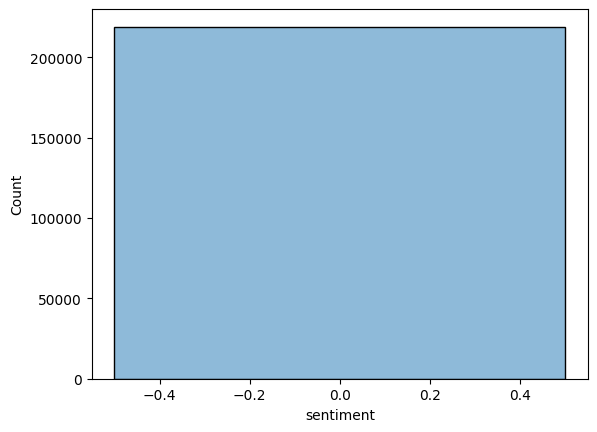

In [ ]:
sns.histplot(df['sentiment'],kde=True)

<Axes: ylabel='count'>

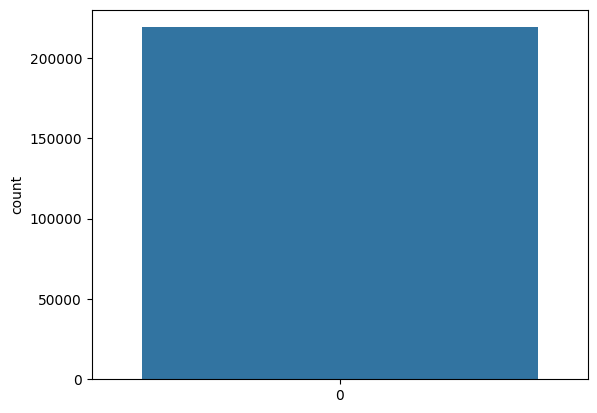

In [ ]:
sns.countplot(df['sentiment'])

In [ ]:
df['query'].value_counts()

NO_QUERY    219131
Name: query, dtype: int64

In [ ]:
df=df.drop(columns=['query'])

In [ ]:
df.head()

,sentiment,id,date,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [ ]:
texts = df['text']

In [ ]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

AttributeError: ignored

NameError: ignored

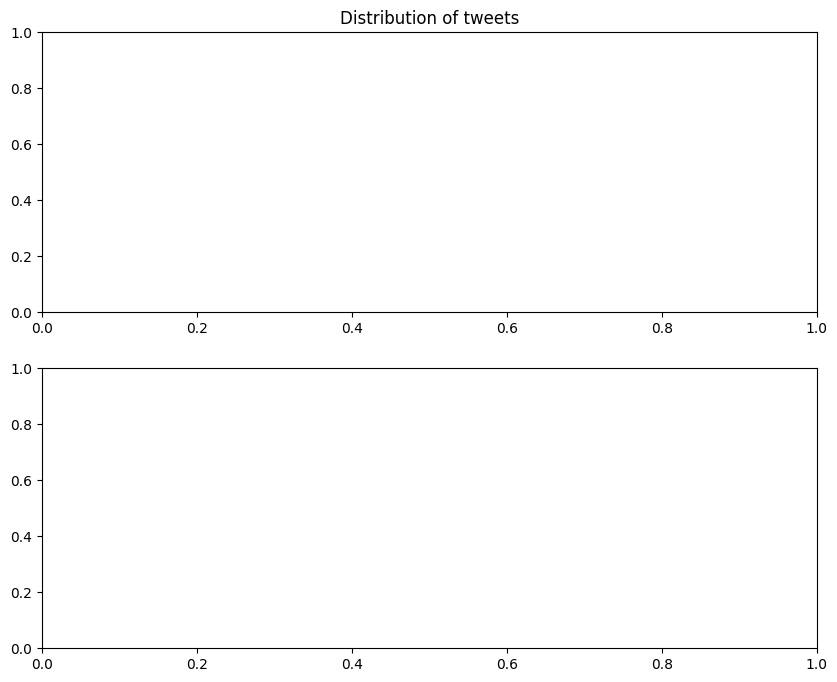

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
axes[0].set_title('Distribution of tweets')
sns.barplot(text_lens, ax=axes[0])
sns.histplot(text_lens,bins=100, kde=True, ax=axes[1],color='blue')
axes[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()